# Shipment Delay Prediction

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

### Loading the dataset

In [3]:
df = pd.read_excel("dataset.xlsx")

### EDA - Data Inspection

In [5]:
print(df.head())  # First few rows
print(df.info())  # Information on data types and missing values
print(df.describe())  # Statistical summary of numerical features

  Shipment ID     Origin Destination Shipment Date Planned Delivery Date  \
0  SHIP000000     Jaipur      Mumbai    2023-04-26            2023-05-01   
1  SHIP000001  Bangalore       Delhi    2023-02-09            2023-02-13   
2  SHIP000002     Mumbai     Chennai    2023-09-19            2023-09-25   
3  SHIP000003  Hyderabad   Ahmedabad    2023-04-01            2023-04-05   
4  SHIP000004    Chennai     Kolkata    2023-11-24            2023-11-26   

  Actual Delivery Date Vehicle Type  Distance (km) Weather Conditions  \
0           2023-05-02      Trailer           1603               Rain   
1           2023-02-17      Trailer           1237              Storm   
2           2023-09-25        Truck           1863              Clear   
3           2023-04-05    Container           1374              Clear   
4           2023-11-28    Container            676              Clear   

  Traffic Conditions Delayed  
0              Light     Yes  
1           Moderate     Yes  
2          

### Checking for missing values

In [7]:
print(df.isnull().sum())

Shipment ID                0
Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64


### Convert date columns to datetime type

In [13]:
df['Shipment Date'] = pd.to_datetime(df['Shipment Date'])
df['Planned Delivery Date'] = pd.to_datetime(df['Planned Delivery Date'])
df['Actual Delivery Date'] = pd.to_datetime(df['Actual Delivery Date'])

### Feature Engineering: Calculate delay duration (in hours or days)

In [17]:
df['Delay Duration'] = (df['Actual Delivery Date'] - df['Planned Delivery Date']).dt.total_seconds() / 3600  # Duration in hours


### Check for outliers or unusual data points in numerical columns

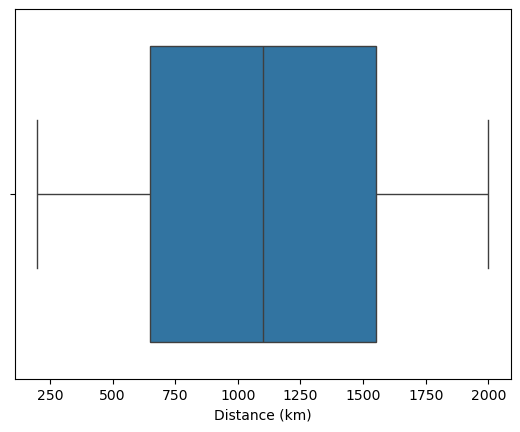

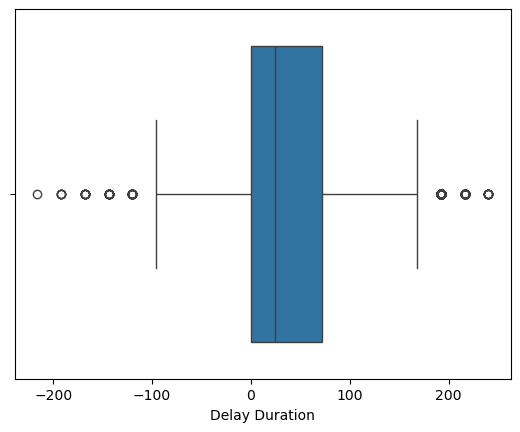

In [21]:
sns.boxplot(x=df['Distance (km)'])
plt.show()

sns.boxplot(x=df['Delay Duration'])
plt.show()


### Label encoding categorical features (for correlation analysis)

In [23]:
label_encoder = LabelEncoder()

df['Origin'] = label_encoder.fit_transform(df['Origin'])
df['Destination'] = label_encoder.fit_transform(df['Destination'])
df['Vehicle Type'] = label_encoder.fit_transform(df['Vehicle Type'])
df['Weather Conditions'] = label_encoder.fit_transform(df['Weather Conditions'])
df['Traffic Conditions'] = label_encoder.fit_transform(df['Traffic Conditions'])
df['Delayed'] = df['Delayed'].map({'Yes': 1, 'No': 0})

### Correlation matrix - Only include numeric columns

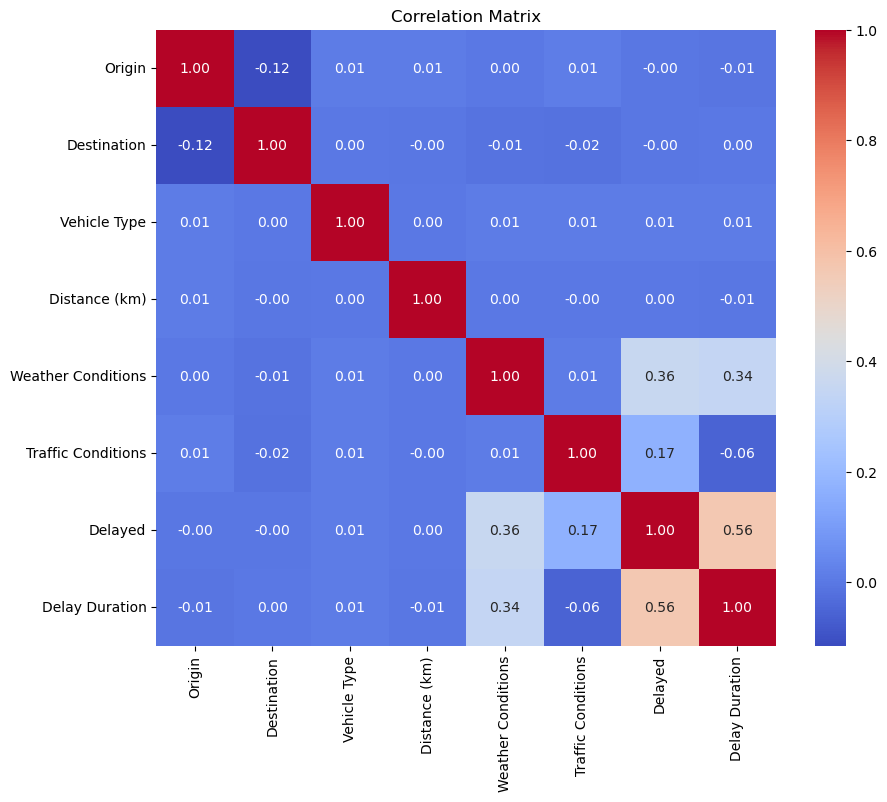

In [27]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
corr = numeric_df.corr()  # Compute the correlation matrix

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()


## Using Correlation Matrix have identified that Weather Conditions and Delay Duration are mostly correlated to Delayed, so we are using this both parameters to predicts the delayed (target variable)

### Visualizing distribution of target variable 'Delayed'

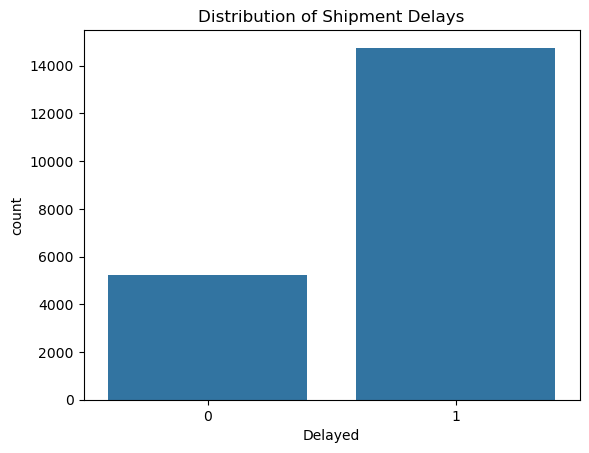

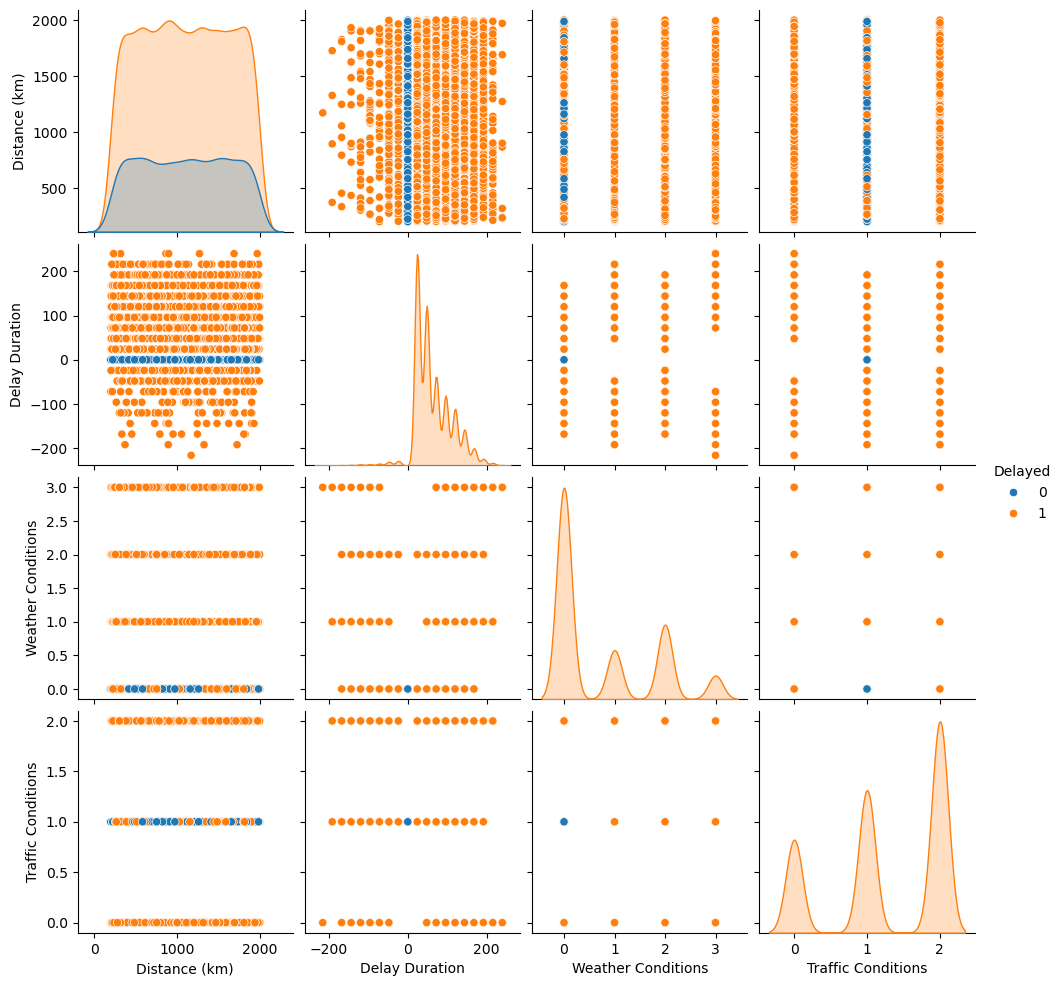

In [31]:
sns.countplot(x='Delayed', data=df)
plt.title("Distribution of Shipment Delays")
plt.show()

# Visualizing pairplots for relationships
sns.pairplot(df[['Distance (km)', 'Delay Duration', 'Weather Conditions', 'Traffic Conditions', 'Delayed']], hue='Delayed')
plt.show()

# Model Building

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare your feature matrix (X) and target vector (y)
X = df[['Weather Conditions', 'Delay Duration']]
y = df['Delayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




Accuracy: 0.99075
Confusion Matrix:
 [[1059    0]
 [  37 2904]]


### Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_tree = tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Accuracy: 1.0
Confusion Matrix:
 [[1059    0]
 [   0 2941]]


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


### Support Vector Machine

In [39]:
from sklearn.svm import SVC

# Initialize and fit the Support Vector Machine model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svm = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Accuracy: 1.0
Confusion Matrix:
 [[1059    0]
 [   0 2941]]


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Prepare your feature matrix (X) and target vector (y)
X = df[['Weather Conditions', 'Delay Duration']]
y = df['Delayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(random_state=42)
}

# Loop through models, train, predict, and evaluate
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the evaluation results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Detailed Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Evaluating Logistic Regression...
Accuracy: 0.9908
Precision: 1.0000
Recall: 0.9874
F1 Score: 0.9937
Confusion Matrix:
[[1059    0]
 [  37 2904]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1059
           1       1.00      0.99      0.99      2941

    accuracy                           0.99      4000
   macro avg       0.98      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000


Evaluating Decision Tree...
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[1059    0]
 [   0 2941]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1059
           1       1.00      1.00      1.00      2941

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Evaluatin

### Install Flask and required libraries

In [91]:
import threading
from flask import Flask, request, jsonify
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# --- Step 1: Train the Model and Save it ---
# Sample data (Replace with your actual data)
data = {
    'Weather Conditions': ['Rain', 'Clear', 'Fog', 'Clear', 'Rain'],
    'Delay Duration': [2.5, 1.0, 5.0, 1.2, 3.0],
    'Delayed': ['Yes', 'No', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(data)

# Encode 'Delayed' target variable (Yes/No -> 1/0)
label_encoder = LabelEncoder()
df['Delayed'] = label_encoder.fit_transform(df['Delayed'])

# Features and target
X = df[['Weather Conditions', 'Delay Duration']]
y = df['Delayed']

# Encode 'Weather Conditions' using LabelEncoder
X.loc[:, 'Weather Conditions'] = label_encoder.fit_transform(X['Weather Conditions'])

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Save the trained model and encoder
joblib.dump(model, 'shipment_delay_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

# --- Step 2: Create Flask App to Serve Predictions ---
app = Flask(__name__)

# Load the saved model and encoder
model = joblib.load('shipment_delay_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Define the prediction route
@app.route('/predict', methods=['POST'])
def predict_shipment_delay():
    # Get the JSON data from the POST request
    data = request.get_json()

    # Ensure the necessary data is provided
    if 'weather_conditions' not in data or 'delay_duration' not in data:
        return jsonify({"error": "Missing data"}), 400

    weather_conditions = data['weather_conditions']
    delay_duration = data['delay_duration']

    # Convert the input data to a DataFrame for prediction
    input_data = pd.DataFrame({
        'Weather Conditions': [weather_conditions],
        'Delay Duration': [delay_duration]
    })

    # Perform necessary preprocessing (e.g., encoding)
    try:
        input_data['Weather Conditions'] = label_encoder.transform(input_data['Weather Conditions'])
    except:
        return jsonify({"error": "Invalid weather conditions value"}), 400

    # Make the prediction
    prediction = model.predict(input_data)
    
    # Convert prediction to human-readable format
    result = "Delayed" if prediction[0] == 1 else "On Time"
    
    # Return the prediction in JSON format
    return jsonify({"prediction": result})

# Function to run Flask app in a separate thread
def run_flask():
    app.run(debug=False, use_reloader=False, port=5000)

# Run Flask app in a separate thread
flask_thread = threading.Thread(target=run_flask)
flask_thread.start()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


### Test the API using requests

In [93]:
import requests

# Example input data
data = {
    'weather_conditions': 'Clear',
    'delay_duration': 1.0
}

# Send POST request to the Flask API
url = 'http://127.0.0.1:5000/predict'
response = requests.post(url, json=data)

# Print the response from the Flask app
print(response.json())


127.0.0.1 - - [20/Dec/2024 16:26:22] "POST /predict HTTP/1.1" 200 -


{'prediction': 'On Time'}
